In [1]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [2]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [3]:
!pip install bing-image-downloader
from bing_image_downloader import downloader
for q in ['grizzly bear', 'black bear', 'teddy bear']:
    downloader.download(q, limit=20, output_dir="bears2", adult_filter_off=True, force_replace=False, timeout=5)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from http://2.bp.blogspot.com/-NjMTuklENdE/UHzVv_8dIxI/AAAAAAAAA-U/tNBsQDn8kFI/s1600/Grizzly+Bear+Pic.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://www.pbs.org/wnet/nature/files/2018/07/Bear133.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://upload.wikimedia.org/wikipedia/commons/e/e2/Grizzlybear55.jpg
[%] File Downloaded !

[%] Downloading Image #4 from http://wildlifearticles.co.uk/wp-content/uploads/2015/10/grizzly-bear3.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://s3.amazonaws.com/images.gearjunkie.com/uploads/2015/07/Grizzly-Bear.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://i2-prod.mirror.co.uk/incoming/article6580991.ece/ALTERNATES/s615/Grizzly-Bear.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.tsln.com/wp-content/uploads/2018/10/bears-tsln-101318-3-1240x826.jpg
[%] File Downloaded !

[%] Downloading 

In [4]:
path = Path('bears2')

In [5]:
fns = get_image_files(path)

In [6]:
failed = verify_images(fns)
failed

(#0) []

In [7]:
failed.map(Path.unlink)

(#0) []

In [75]:
def parent_label_multi(o):
    return [Path(o).parent.name.split(' ')[0]]

bears = DataBlock(
    blocks=(ImageBlock, MultiCategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=20),
    get_y=parent_label_multi,
    item_tfms=RandomResizedCrop(128, min_scale=0.35))

In [76]:
dls = bears.dataloaders(path,bs=10)

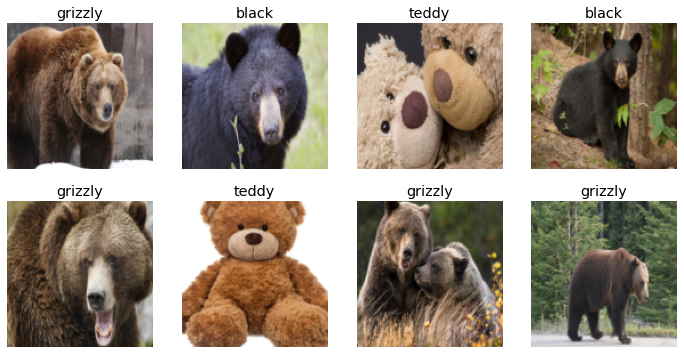

In [77]:
dls.valid.show_batch(max_n=8, nrows=2)

In [78]:
dls.train.vocab

['black', 'grizzly', 'teddy']

In [83]:
#Look at underlying tensors
xb,yb = dls.train.one_batch()
xb.shape,yb.shape,yb

(torch.Size([10, 3, 128, 128]),
 torch.Size([10, 3]),
 TensorMultiCategory([[0., 0., 1.],
         [0., 0., 1.],
         [0., 1., 0.],
         [1., 0., 0.],
         [1., 0., 0.],
         [0., 1., 0.],
         [0., 1., 0.],
         [0., 0., 1.],
         [0., 0., 1.],
         [1., 0., 0.]], device='cuda:0'))

In [80]:
learn = cnn_learner(dls,resnet50, metrics=partial(accuracy_multi, thresh=0.2))

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=7.585775847473997e-07)

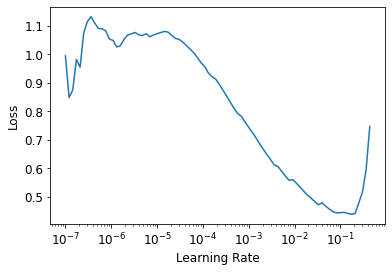

In [81]:
learn.lr_find()

In [84]:
learn = cnn_learner(dls,resnet50, metrics=partial(accuracy_multi, thresh=0.2))
learn.fine_tune(10, base_lr = 3e-3, freeze_epochs=8)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.904783,0.508866,0.472222,00:02
1,0.713469,0.228149,0.805556,00:03
2,0.505553,0.097227,0.916667,00:02
3,0.404759,0.066380,0.972222,00:03
4,0.338532,0.060002,0.916667,00:02
5,0.279598,0.058685,0.972222,00:02
6,0.242414,0.074700,0.972222,00:02
7,0.202162,0.099054,0.944444,00:03


epoch,train_loss,valid_loss,accuracy_multi,time
0,0.033526,0.110777,0.972222,00:03
1,0.039118,0.115756,0.916667,00:02
2,0.042169,0.350810,0.888889,00:03
3,0.080667,0.316480,0.972222,00:03
4,0.104665,0.011418,0.972222,00:03
5,0.089857,0.007003,1.000000,00:02
6,0.088887,0.004536,1.000000,00:02
7,0.103707,0.002732,1.000000,00:03
8,0.087745,0.003738,1.000000,00:03
9,0.088111,0.003568,1.000000,00:02


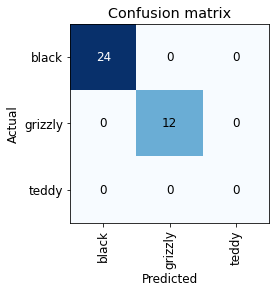

In [85]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
#Why are there no teddys?

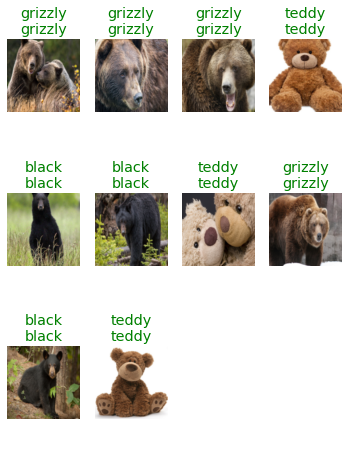

In [87]:
learn.show_results(ds_idx=1, max_n=20, figsize=(6,8))

In [67]:
bears.summary(path)

Setting-up type transforms pipelines
Found 64 items
2 datasets of sizes 52,12
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label_multi -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}

Building one sample
  Pipeline: PILBase.create
    starting from
      bears2/teddy bear/Image_17.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=1280x1280
  Pipeline: parent_label_multi -> MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} -> OneHotEncode -- {'c': None}
    starting from
      bears2/teddy bear/Image_17.jpg
    applying parent_label_multi gives
      [teddy]
    applying MultiCategorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorMultiCategory([2])
    applying OneHotEncode -- {'c': None} gives
      TensorMultiCategory([0., 0., 1.])

Final sample: (PILImage mode=RGB size=1280x1280, TensorMultiCategory([0., 0., 1.]))


Setting up after_item: Pipeline: RandomRes

In [88]:
!pip install voila
!jupyter serverextension enable voila --sys-prefix

     |████████████████████████████████| 1.9 MB 28.1 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 12.1 MB/s eta 0:00:01
     |████████████████████████████████| 552 kB 81.5 MB/s eta 0:00:01
     |████████████████████████████████| 223 kB 56.8 MB/s eta 0:00:01
  Attempting uninstall: nbconvert
    Found existing installation: nbconvert 5.6.1
    Uninstalling nbconvert-5.6.1:
      Successfully uninstalled nbconvert-5.6.1
ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

nbdev 1.0.18 requires nbconvert<6, but you'll have nbconvert 6.0.7 which is incompatible.
Enabling: voila
- Writing config: /opt/conda/envs/fastai/etc/jupyter
    - Validating...
      voila 0.2.4 OK
